# Project 5 : CS548 - Text Mining: Spot Deceptive TripAdvisor Hotel's Reviews

** http://web.cs.wpi.edu/~cs548/f16/Projects/Project5/ **

** By: Yousef Fadila ** 

# Guiding Quesions:




Training data:
-- Deceptive Opinion Spam Corpus v1.4 - downloaded from http://myleott.com/op_spam/

Examination data:
--  TripAdvisor reviews downloaded from http://myleott.com/op_spam/

In [31]:
# Global Import
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pylab as py
import matplotlib.pyplot as plt
import scipy
from IPython.display import HTML
from datetime import datetime
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
lastRunTime = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
import re
from sklearn import tree
import json
%matplotlib inline

In [5]:
# load training data: load Deceptive Opinion Spam Corpus
dataset = load_files('training-data', encoding='utf-8', decode_error='replace',shuffle=False)
print("n_samples: %d" % len(dataset.data))

print("Done: " + lastRunTime)

n_samples: 1602
Done: 2016-12-03 00:24:30


In [28]:
# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.10, random_state=None)
min_df=3
max_df=0.96
# ngram (1,3) gives better percsion than 1,2 and 1,4 doesn't improve accuracy. 
ngram_range = (1,3) 
TfidfVect= TfidfVectorizer(min_df = min_df, max_df = max_df, ngram_range = ngram_range).fit(docs_train)
Xtrain = TfidfVect.transform(docs_train).toarray()
print("Xtrain:" + str(Xtrain.shape))
Xtest = TfidfVect.transform(docs_test).toarray()
print("Xtest:" + str(Xtest.shape))

#clf = tree.DecisionTreeClassifier()
clf  = LinearSVC(C=1000)

clf.fit(Xtrain, y_train)
y_predicted = clf.predict(Xtest)

print("Done: " + lastRunTime)

Xtrain:(1441, 22411)
Xtest:(161, 22411)
Done: 2016-12-03 01:02:34


**Classification Report**

                    precision    recall  f1-score   support

negative_deceptive       0.88      0.86      0.87        44
 negative_truthful       0.89      0.84      0.86        49
positive_deceptive       0.89      0.78      0.83        32
 positive_truthful       0.77      0.94      0.85        36

       avg / total       0.86      0.86      0.86       161

**Confusion Matrix**

[[38  5  1  0]
 [ 5 41  0  3]
 [ 0  0 25  7]
 [ 0  0  2 34]]
0: negative_deceptive  1: negative_truthful
2: positive_deceptive  3: positive_truthful


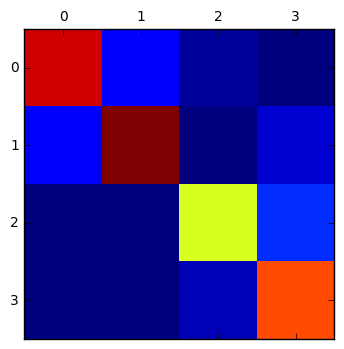

Done: 2016-12-03 01:02:34


In [29]:
# Print the classification report
print("**Classification Report**\n")
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
print("**Confusion Matrix**\n")
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# lets print the target array so we could know which index refer to positive or negative.
print("0: " + dataset.target_names[0] + "  1: " + dataset.target_names[1])
print("2: " + dataset.target_names[2] + "  3: " + dataset.target_names[3]) 
plt.matshow(cm)
plt.show()

print("Done: " + lastRunTime)

** Load Tripadvisor reviews **

In [53]:
#reviews_file = 'reviews.txt'
#reviews_file = 'reviews_reduced.txt' 
#reviews_file = 'reviews_sample.txt' 
reviews_file = 'reviews_mini.txt' 
reviews = [json.loads(line) for line in open(reviews_file)]

print(len(reviews))

79


In [57]:
reviews_text = [review['text'] for review in reviews]
reviews_rating = [review['ratings']['overall'] for review in reviews]

In [59]:
reviews_pd = {'text': reviews_text,'rating': reviews_rating}
df = pd.DataFrame(reviews_pd)


In [61]:
Xdata = TfidfVect.transform(df['text']).toarray()

In [63]:
Xdata_predicted = clf.predict(Xdata)

In [64]:
Xdata_predicted

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 0, 2,
       1, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 0, 3, 1, 3, 3, 3, 1, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 2])